In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [7]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


**INTRODUCCIÓN**

Bitcoin vio su nacimiento en el año 2009, y hasta la actualidad se desconoce la identidad real de su creador, a quien se le atribuye el seudónimo de Satoshi Nakamoto pudiendo ser un individuo o un grupo de personas.

Bitcoin es una moneda virtual o un medio de intercambio electrónico que sirve para adquirir productos y servicios como cualquier otra moneda. La diferencia con el resto de las monedas "FIAT" se da en que esta moneda digital es descentralizada, es decir que no existe una autoridad o ente de control que sea responsable de su emisión y registro de sus movimientos.

Por tal motivo, el precio de este activo se regula en el propio mercado de compra-venta, donde los oferentes y compradores emiten órdenes de venta y órdenes de compra estableciendo precios de entrada o salida al activo.

En los últimos años, se ha visto un creciente interés por parte de grandes empresas en aceptar Bitcoin como forma de pago, o bien resguardar parte de su patrimonio en este activo; esto ha generado que se dispare su precio llegando a tocar casi los usd 70.000 en noviembre de 2021.

**HIPÓTESIS 1**

La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

En el siguiente gráfico, se contrastará la evolución del market cap de Bitcoin, para demostrar como la evolución de este sigue la misma tendencia que la evolución del precio del activo.

Text(0.5, 1.0, 'Grafico precio BTC')

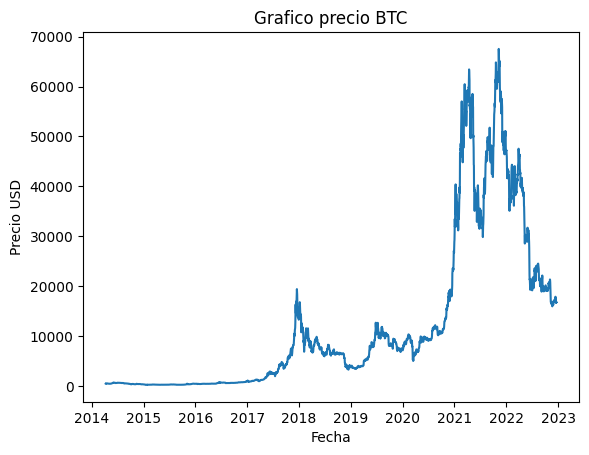

In [8]:
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD
ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')

Text(0.5, 1.0, 'Capitalización de mercado de BTC expresada en USD Miles de Millones')

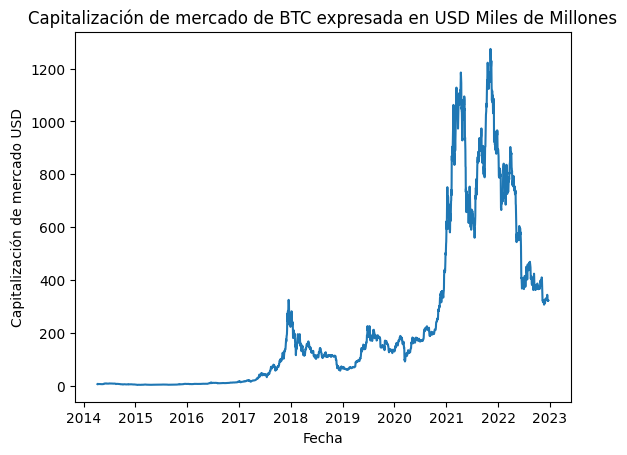

In [9]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalización de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalización de mercado USD')
ax.set_title('Capitalización de mercado de BTC expresada en USD Miles de Millones')

**CONCLUSION 1**

En el gráfico podemos ver como la tendencia de la capitalización de mercado respeta los mismos parametros que los del gráfico de la evolución del precio de BTC.

Al generar un gráfico de dispersoción encontramos que prácticamente no existen valores atípicos en este análisis.

**HIPÓTESIS 2**

Como segunda hipótesis a plantear, surge la idea de que el precio de Bitcoin debería influir de forma directa en la cantidad de direcciones activas en determinados períodos de tiempo. Se plantea esto dado que ante precios mayores, aquellos que sean poseedores de wallets que contengan BTC tendrán mayores incentivos para realizar transacciones de compra-venta.
Para analizar este fenómeno se realizan los siguientes cálculos.

In [10]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235


**CONCLUSIÓN 2**

Al realizar el cálculo del indice de correlación entre las "active adresseses" y el precio de BTC se nos muestra una fuerte correlación positiva entre estos factores, ya que el resultado de 0.665 se considera cercano a 1.